DISCLAIMER: We are making a lot of simplifications here. In particular we don't deal with sampling rate, but just play with the pure C/A code

We load the GPS C/A PRN code (#3) sequence and plot thing

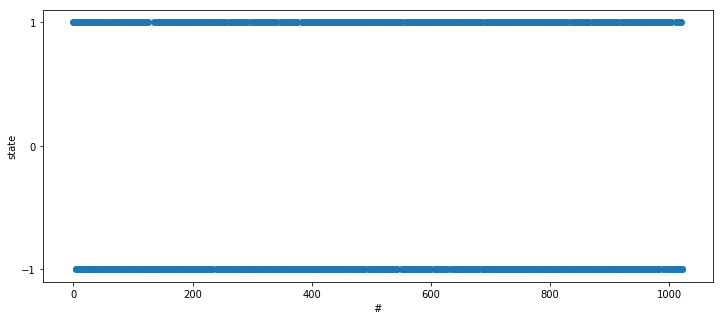

In [184]:
import numpy as np
import matplotlib.pyplot as plt
a=np.loadtxt('prn.txt').transpose()
plt.figure(1,figsize=(12, 5))  
plt.plot(a,'o',label='C/A code')
plt.yticks(np.arange(-1,2,1))
plt.xlabel('#')
plt.ylabel('state')
plt.show()


Zoom in to the first 20 chips

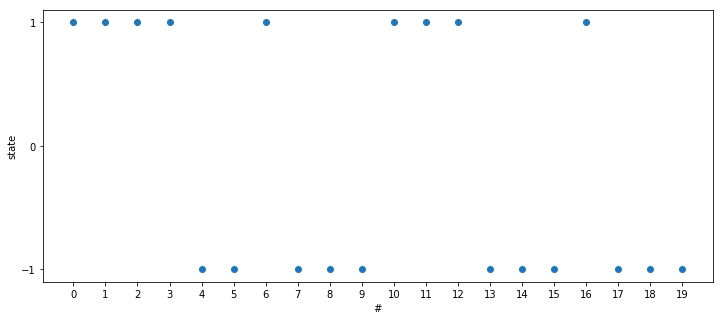

In [177]:
plt.figure(1,figsize=(12, 5))  
plt.plot(a[0:20],'o',label='C/A code')
plt.xticks(np.arange(0,20,1))
plt.yticks(np.arange(-1,2,1))
plt.xlabel('#')
plt.ylabel('state')
plt.show()

Compute autocorrelation

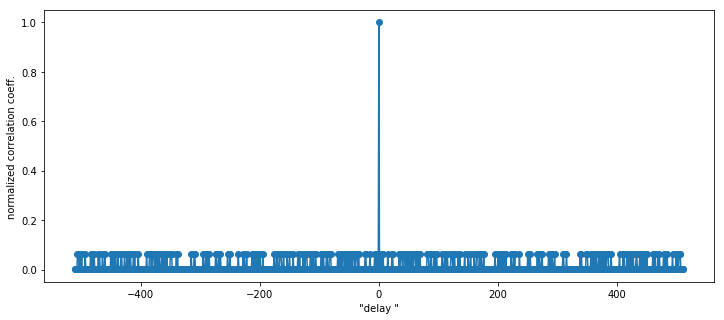

In [72]:
#correlate by using FFTs 
from scipy.fftpack import fft, ifft,fftshift
c= fftshift(np.absolute(ifft(fft(a)*(fft(a)).conj()))/1023)
'delay axis from -511 to +511 chips'
d=np.arange(-511,512)
plt.figure(1,figsize=(12, 5)) 
plt.plot(d,c,'o-',)
plt.xlabel('\"delay \"')
plt.ylabel('normalized correlation coeff.')
plt.show()

Zoom in around zero delay

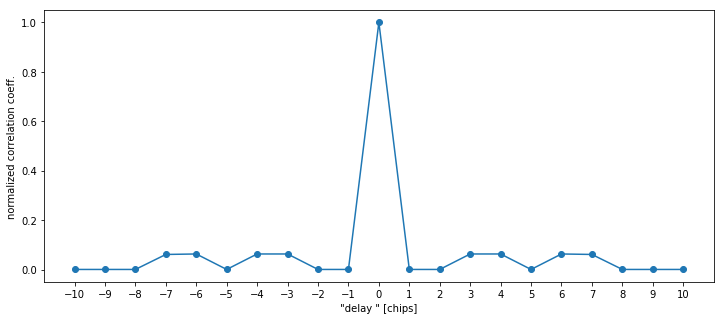

In [69]:
plt.figure(1,figsize=(12, 5))  
plt.plot(d[501:522],c[501:522],'o-',)
plt.xlabel('\"delay \" [chips]')
plt.xticks(d[501:522])
plt.ylabel('normalized correlation coeff.')
plt.show()

Assume now that one code is slightly time-shifted than the other one (e.g. by 100 chips)

In [71]:
b=np.roll(a,100)

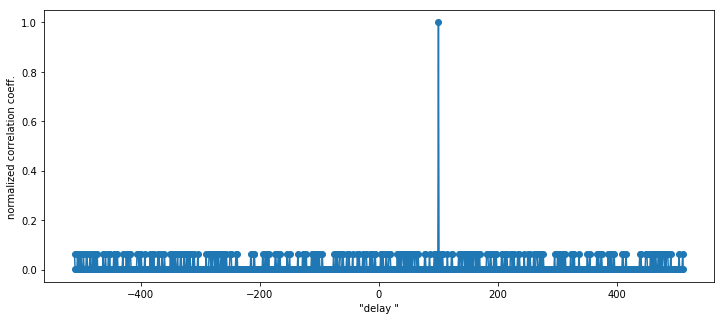

In [77]:
#correlate by using FFTs 
c2= fftshift(np.absolute(ifft(fft(b)*(fft(a)).conj()))/1023)
'delay axis from -511 to +511 chips'
d=np.arange(-511,512)
plt.figure(1,figsize=(12, 5)) 
plt.plot(d,c2,'o-',)
plt.xlabel('\"delay \"')
plt.ylabel('normalized correlation coeff.')
plt.show()

Zoom in around peak

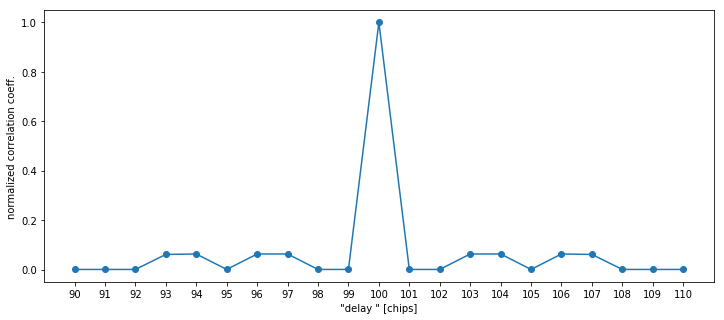

In [79]:
plt.figure(1,figsize=(12, 5))  
plt.plot(d[601:622],c2[601:622],'o-',)
plt.xlabel('\"delay \" [chips]')
plt.xticks(d[601:622])
plt.ylabel('normalized correlation coeff.')
plt.show()

Now we add white noise (e.g. 2 times more than the magnitude of the C/A code on the signal) on the delayed signal and plot the result. Where is the C/A code now?

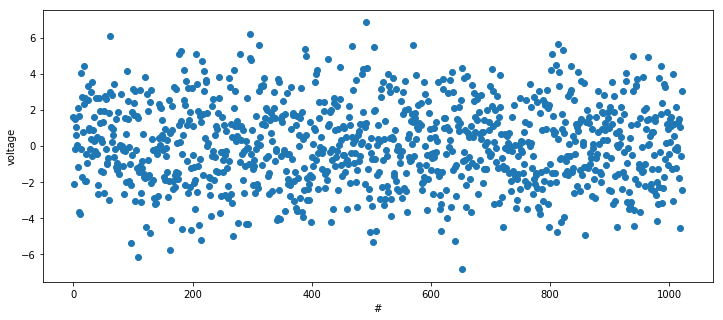

In [182]:
b2=b+np.random.normal(0,2.0, 1023) # zero mean, std.dev = 3
plt.figure(1,figsize=(12, 5))  
plt.plot(b2,'o',label='C/A code')
plt.xlabel('#')
plt.ylabel('voltage')
plt.show()



But what happens if we try to correlate against the clean "replica" signal

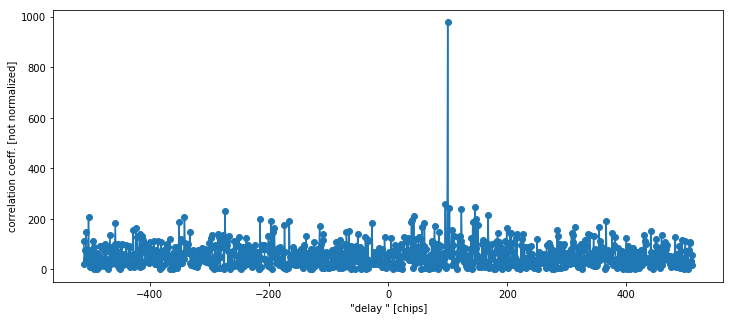

In [183]:
c3= fftshift(np.absolute(ifft(fft(b2)*(fft(a)).conj())))
'delay axis from -511 to +511 chips'
d=np.arange(-511,512)
plt.figure(1,figsize=(12, 5)) 
plt.plot(d,c3,'o-',)
plt.xlabel('\"delay \" [chips]')
plt.ylabel('correlation coeff. [not normalized]')
plt.show()

Zoom in

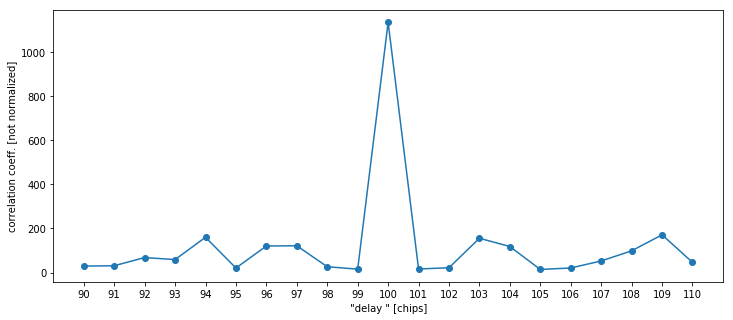

In [181]:
plt.figure(1,figsize=(12, 5))  
plt.plot(d[601:622],c3[601:622],'o-',)
plt.xlabel('\"delay \" [chips]')
plt.xticks(d[601:622])
plt.ylabel('correlation coeff. [not normalized]')
plt.show()

The peak is still at the position where it should be and we can clearly extract the delay!